In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# EDA

Loading the dataset

In [33]:
# data=pd.read_csv(r"C:\Users\sasiv\sasi\P applications\Hizen.ai\events.csv")
data = pd.read_csv("events.csv")

first few rows of the dataset

In [34]:
data.head()

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session
0,2020-09-24 11:57:06 UTC,view,1996170,2144415922528452715,electronics.telephone,NaN,31.90,1515915625519388267,LJuJVLEjPT
1,2020-09-24 11:57:26 UTC,view,139905,2144415926932472027,computers.components.cooler,zalman,17.16,1515915625519380411,tdicluNnRY
2,2020-09-24 11:57:27 UTC,view,215454,2144415927158964449,NaN,NaN,9.81,1515915625513238515,4TMArHtXQy
3,2020-09-24 11:57:33 UTC,view,635807,2144415923107266682,computers.peripherals.printer,pantum,113.81,1515915625519014356,aGFYrNgC08
4,2020-09-24 11:57:36 UTC,view,3658723,2144415921169498184,NaN,cameronsino,15.87,1515915625510743344,aa4mmk0kwQ


converting "event_time" to a DateTime object

In [35]:
data['event_time'] = pd.to_datetime(data['event_time'])

In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 885129 entries, 0 to 885128
Data columns (total 9 columns):
 #   Column         Non-Null Count   Dtype              
---  ------         --------------   -----              
 0   event_time     885129 non-null  datetime64[ns, UTC]
 1   event_type     885129 non-null  object             
 2   product_id     885129 non-null  int64              
 3   category_id    885129 non-null  int64              
 4   category_code  648910 non-null  object             
 5   brand          672765 non-null  object             
 6   price          885129 non-null  float64            
 7   user_id        885129 non-null  int64              
 8   user_session   884964 non-null  object             
dtypes: datetime64[ns, UTC](1), float64(1), int64(3), object(4)
memory usage: 60.8+ MB


calculating the null values

In [37]:
(data.isnull().sum().sum()/(data.shape[0]*data.shape[1]))*100

np.float64(5.633177637258399)

total number of rows before removing the null values

In [38]:
data.shape[0]

885129

Statistical summary for numerical columns

In [39]:
# "Numerical Columns Summary:\n", data.describe()
print("Numerical Columns Summary:\n", data.describe())

Numerical Columns Summary:
          product_id   category_id          price       user_id
count  8.851290e+05  8.851290e+05  885129.000000  8.851290e+05
mean   1.906621e+06  2.144423e+18     146.328713  1.515916e+18
std    1.458708e+06  6.165105e+14     296.807683  3.554165e+07
min    1.020000e+02  2.144416e+18       0.220000  1.515916e+18
25%    6.988030e+05  2.144416e+18      26.460000  1.515916e+18
50%    1.452883e+06  2.144416e+18      65.710000  1.515916e+18
75%    3.721194e+06  2.144416e+18     190.490000  1.515916e+18
max    4.183880e+06  2.227847e+18   64771.060000  1.515916e+18


Statistical summary for categorical columns

In [40]:
categorical_columns = ['brand', 'category_code']
for col in categorical_columns:
    print(f"\nColumn: {col}")
    print("Unique Values:", data[col].nunique()) # unique values count
    print("Value Counts:\n", data[col].value_counts()) # each value frequency


Column: brand
Unique Values: 999
Value Counts:
 brand
asus        27706
gigabyte    27673
msi         24877
palit       24802
samsung     23208
            ...  
pozitiv         1
maxwell         1
beward          1
leomax          1
cassida         1
Name: count, Length: 999, dtype: int64

Column: category_code
Unique Values: 107
Value Counts:
 category_code
computers.components.videocards     116717
electronics.telephone                84360
computers.peripherals.printer        43224
stationery.cartrige                  38725
electronics.audio.acoustic           26766
                                     ...  
furniture.bedroom.blanket               26
appliances.kitchen.refrigerators        15
furniture.kitchen.chair                 15
accessories.briefcase                   13
auto.accessories.winch                   6
Name: count, Length: 107, dtype: int64


In [41]:
# Check for missing data
missing_data = data.isnull().sum()
missing_data

event_time            0
event_type            0
product_id            0
category_id           0
category_code    236219
brand            212364
price                 0
user_id               0
user_session        165
dtype: int64

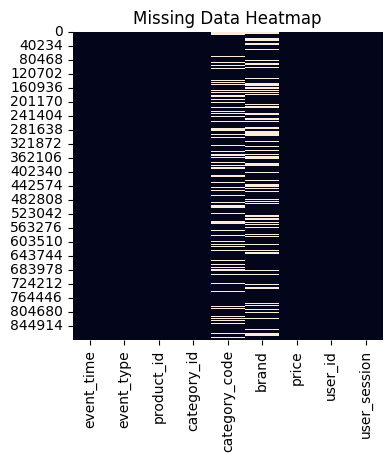

In [42]:


# Visualize missing data using a heatmap
plt.figure(figsize=(4, 4))
sns.heatmap(data.isnull(), cbar=False)
plt.title('Missing Data Heatmap')
plt.show()

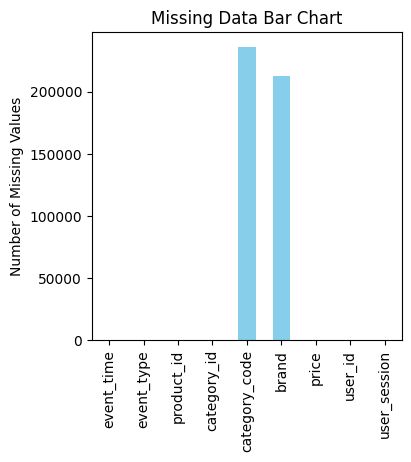

In [43]:
# Visualize missing data using a bar chart
plt.figure(figsize=(4,4))
missing_data.plot(kind='bar', color='skyblue')
plt.title('Missing Data Bar Chart')
plt.ylabel('Number of Missing Values')
plt.show()

In [44]:
# Identify columns with the most missing values
print("Columns with the most missing values:")
print(missing_data[missing_data > 0].sort_values(ascending=False))

Columns with the most missing values:
category_code    236219
brand            212364
user_session        165
dtype: int64


In [45]:
(data.isnull().sum()/data.shape[0])*100

event_time        0.000000
event_type        0.000000
product_id        0.000000
category_id       0.000000
category_code    26.687522
brand            23.992435
price             0.000000
user_id           0.000000
user_session      0.018641
dtype: float64

Total null values percentage in "category_code,brand,user_session" columns/features is less than 50% so we can delete the rows which having nullvalues 

category_code = 26.7% null values
brand = 23.9% null values
user_session = 0.018 % null values

and total dataset contains the 5.63 % null values so we can delete them all

removing null values

In [46]:
data.dropna(inplace=True)

totaly we removed 41% rows from the actual dataset for removing the null values

In [47]:
data.shape[0]

516256

<Axes: xlabel='event_type', ylabel='count'>

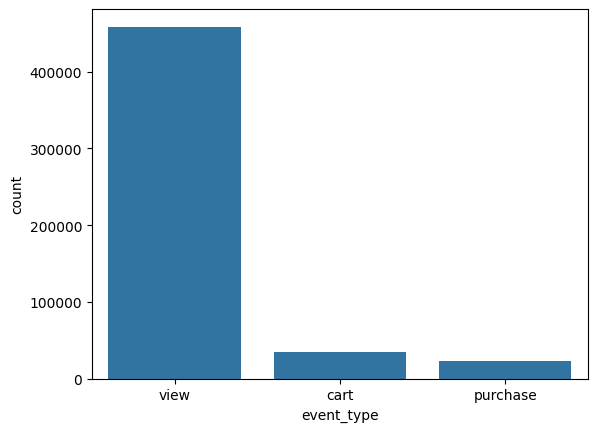

In [48]:
sns.countplot(x='event_type', data=data)

In [49]:
user_activity = data.groupby('user_id').agg({
    'event_time': ['max', 'min', 'count'],  # Last activity, first activity, total activits
    'event_type': lambda x: (x == 'purchase').sum(),  # Count purchases
    'price': ['mean', 'sum'],  # Average and total spending
    'brand': lambda x: ','.join(x.dropna().unique())  # List all unique brands visited
})


In [50]:
user_activity['most_viewed_brand'] = data.groupby('user_id')['brand'].agg(lambda x: x.mode().iloc[0])

In [51]:
user_activity.columns = ['_'.join(col).strip() for col in user_activity.columns]

In [52]:
# Calculate days since last activity
latest_event_time = data['event_time'].max()
user_activity['days_since_last_event'] = (latest_event_time - user_activity['event_time_max']).dt.days

In [53]:
user_activity.shape[0]

224971

So,Totaly we have 224971 users

In [54]:
user_activity.head()

,event_time_max,event_time_min,event_time_count,event_type_<lambda>,price_mean,price_sum,brand_<lambda>,most_viewed_brand_,days_since_last_event
user_id,,,,,,,,,
1515915625353226922,2020-10-29 11:28:35+00:00,2020-10-29 11:28:35+00:00,1,0,76.480000,76.48,honor,honor,122
1515915625353230683,2020-12-12 10:33:09+00:00,2020-11-09 08:52:51+00:00,13,0,62.686923,814.93,"logitech,dell,smartbuy,sven,bbk,perfeo,canyon,...",creative,78
1515915625353230922,2020-10-02 08:23:40+00:00,2020-10-02 08:23:40+00:00,1,0,274.400000,274.40,msi,msi,149
1515915625353234047,2021-02-18 09:11:44+00:00,2020-09-29 16:01:54+00:00,35,0,156.220286,5467.71,"honor,samsung,sennheiser,steelseries,sony,hoco...",samsung,10
1515915625353236157,2021-02-11 15:50:40+00:00,2021-02-11 15:50:40+00:00,1,0,52.490000,52.49,ritmix,ritmix,17


In [55]:
# Count of Brands in 'brand_<lambda>' column
user_activity['brand_count'] = user_activity['brand_<lambda>'].apply(lambda x: len(x.split(',')))
print("\nTop 10 Users by Number of Brands Visited:")
print(user_activity[['brand_<lambda>', 'brand_count']].sort_values(by='brand_count', ascending=False).head(10))



Top 10 Users by Number of Brands Visited:
                                                        brand_<lambda>  \
user_id                                                                  
1515915625598794428  jvc,bbk,bq,hyundai,mobilepc,sirius,epson,ark,a...   
1515915625599852988  sapphire,msi,amd,asrock,gigabyte,asus,pccooler...   
1515915625591659523  asus,amd,intel,asrock,msi,gigabyte,sapphire,pa...   
1515915625601221143  gigabyte,sapphire,thermaltake,id-cooling,pccoo...   
1515915625475084289  samsung,epson,canon,kyocera,thomson,panasonic,...   
1515915625596223978  amd,thermaltake,chieftec,cougar,crown,hiper,ph...   
1515915625536567608  sapphire,msi,gigabyte,amd,thermaltake,seagate,...   
1515915625360775587  keenetic,mikrotik,accord,thermaltake,aerocool,...   
1515915625604175669  asus,harper,nzxt,id-cooling,aerocool,thermalta...   
1515915625544171483  msi,amd,asrock,cougar,ginzzu,crown,gigabyte,in...   

                     brand_count  
user_id                          

Let's find that the user is churn or not 
note: user is churn if the days since last event is greater then 30 days

In [56]:
# Label churn
user_activity['churn'] = (user_activity['days_since_last_event'] > 30).astype(int)

In [57]:
user_activity = user_activity.reset_index()

In [58]:
user_activity.head()

,user_id,event_time_max,event_time_min,event_time_count,event_type_<lambda>,price_mean,price_sum,brand_<lambda>,most_viewed_brand_,days_since_last_event,brand_count,churn
0,1515915625353226922,2020-10-29 11:28:35+00:00,2020-10-29 11:28:35+00:00,1,0,76.480000,76.48,honor,honor,122,1,1
1,1515915625353230683,2020-12-12 10:33:09+00:00,2020-11-09 08:52:51+00:00,13,0,62.686923,814.93,"logitech,dell,smartbuy,sven,bbk,perfeo,canyon,...",creative,78,9,1
2,1515915625353230922,2020-10-02 08:23:40+00:00,2020-10-02 08:23:40+00:00,1,0,274.400000,274.40,msi,msi,149,1,1
3,1515915625353234047,2021-02-18 09:11:44+00:00,2020-09-29 16:01:54+00:00,35,0,156.220286,5467.71,"honor,samsung,sennheiser,steelseries,sony,hoco...",samsung,10,7,0
4,1515915625353236157,2021-02-11 15:50:40+00:00,2021-02-11 15:50:40+00:00,1,0,52.490000,52.49,ritmix,ritmix,17,1,0


In [59]:
df=pd.DataFrame(user_activity.drop(columns=['brand_<lambda>','event_time_max','event_time_min']))

In [60]:
df.head()

,user_id,event_time_count,event_type_<lambda>,price_mean,price_sum,most_viewed_brand_,days_since_last_event,brand_count,churn
0,1515915625353226922,1,0,76.480000,76.48,honor,122,1,1
1,1515915625353230683,13,0,62.686923,814.93,creative,78,9,1
2,1515915625353230922,1,0,274.400000,274.40,msi,149,1,1
3,1515915625353234047,35,0,156.220286,5467.71,samsung,10,7,0
4,1515915625353236157,1,0,52.490000,52.49,ritmix,17,1,0


In [61]:
from sklearn.preprocessing import LabelEncoder

In [63]:
le_most_viewed_brand_=LabelEncoder()
df['most_viewed_brand_']=le_most_viewed_brand_.fit_transform(df['most_viewed_brand_'])

In [64]:
df.head()

,user_id,event_time_count,event_type_<lambda>,price_mean,price_sum,most_viewed_brand_,days_since_last_event,brand_count,churn
0,1515915625353226922,1,0,76.480000,76.48,258,122,1,1
1,1515915625353230683,13,0,62.686923,814.93,129,78,9,1
2,1515915625353230922,1,0,274.400000,274.40,419,149,1,1
3,1515915625353234047,35,0,156.220286,5467.71,549,10,7,0
4,1515915625353236157,1,0,52.490000,52.49,532,17,1,0


In [65]:
for i in df.columns:
    sns.distplot(df[i])
    sns.boxplot(x=i,data=df)
    plt.show()

In [68]:
from sklearn.model_selection import train_test_split
X = df.drop(columns=['churn','user_id'])
y = df['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [70]:
from sklearn.metrics import classification_report, roc_auc_score
y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))
print("ROC-AUC Score:", roc_auc_score(y_test, clf.predict_proba(X_test)[:, 1]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      9404
           1       1.00      1.00      1.00     35591

    accuracy                           1.00     44995
   macro avg       1.00      1.00      1.00     44995
weighted avg       1.00      1.00      1.00     44995

ROC-AUC Score: 1.0


In [110]:
event_time_count=13
event_type=0
price_mean=62.68
price_sum=814.93
most_viewed_brand_='creative'
days_since_last_event=31
brand_count=9

In [111]:
# event_time_count=int(input("event_time_count="))
# event_type=int(input("event_type="))
# price_mean=float(input("price_mean="))
# price_sum=float(input("price_sum="))
# most_viewed_brand_=input("most_viewed_brand_=")
# days_since_last_event=int(input("days_since_last_event="))
# brand_count=int(input("brand_count="))

In [112]:
new_data=pd.DataFrame({
        'event_time_count':[event_time_count],
        'event_type_<lambda>':[event_type],
        'price_mean':[price_mean],
        'price_sum':[price_sum],
        'most_viewed_brand_':[most_viewed_brand_],
        'days_since_last_event':[days_since_last_event],
        'brand_count':[brand_count]
        })

In [113]:
new_data['most_viewed_brand_']=le_most_viewed_brand_.transform(new_data['most_viewed_brand_'])

In [114]:
output=clf.predict(new_data)

In [115]:
output

array([1])